Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
          Survived      Pclass         Sex         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.383838    2.308642    0.352413   29.361582    0.523008   
std       0.486592    0.836071    0.477990   13.019697    1.102743   
min       0.000000    1.000000    0.000000    0.420000    0.000000   
25%       0.000000    2.000000    0.000000   22.000000    0.000000   
50%       0.000000    3.000000    0.000000   28.000000    0.000000   
75%       1.000000    3.000000    1.000000   35.000000    1.000000   
max       1.000000    3.000000    1.000000   80.000000    8.000000   

  

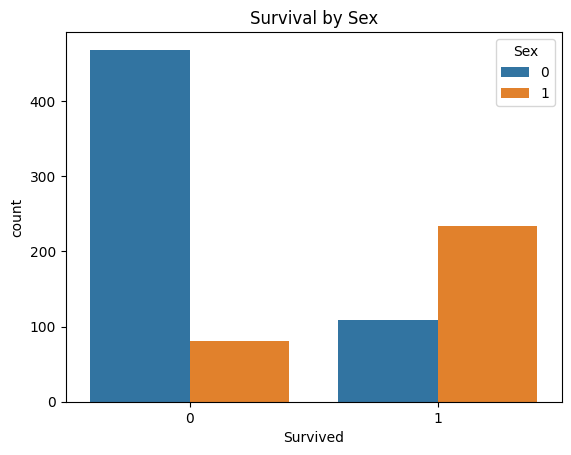

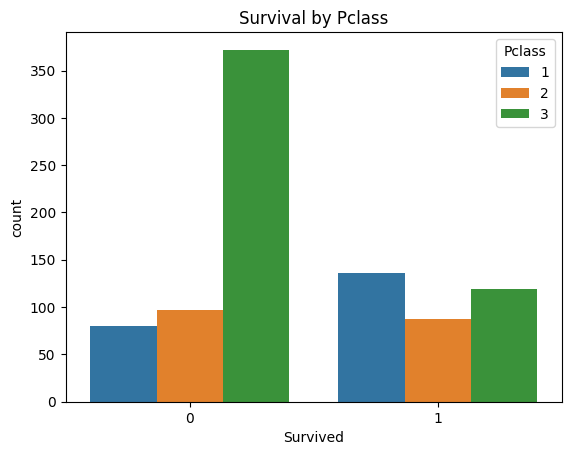

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


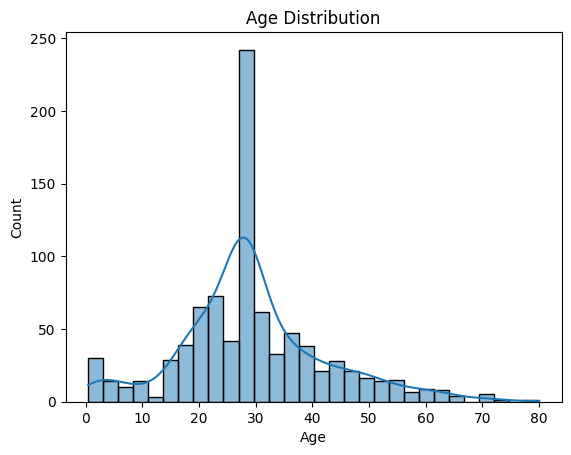

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


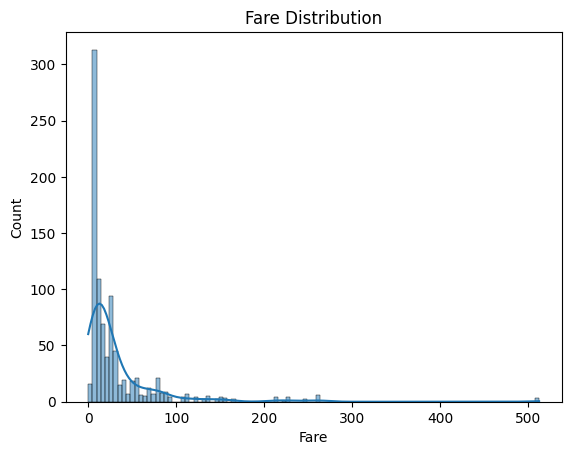

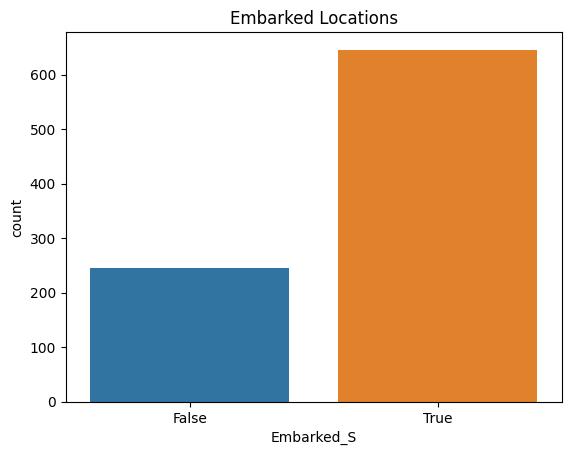

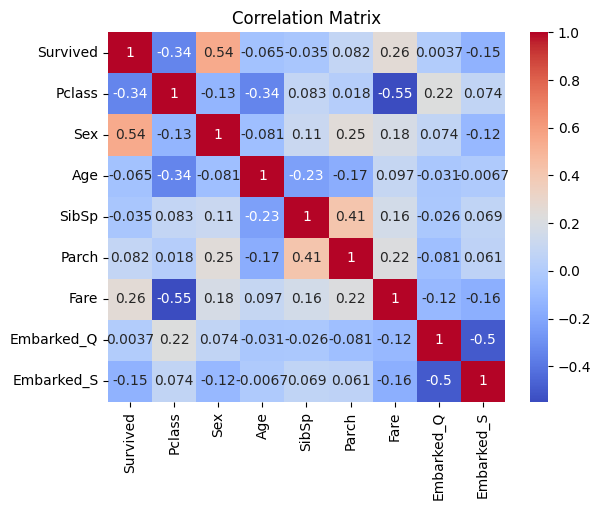

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')

# Handle missing values for 'Age'
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Drop the 'Cabin' column if it exists
if 'Cabin' in train_data.columns:
    train_data = train_data.drop(columns=['Cabin'])

# Handle missing values for 'Embarked'
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Convert 'Sex' to numerical values
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Drop non-numeric columns
train_data = train_data.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Verify that there are no more missing values
missing_values_after = train_data.isnull().sum()
print(missing_values_after)

# Exploratory Data Analysis (EDA)

# Summary statistics
summary_stats = train_data.describe(include='all')
print(summary_stats)

# Survival rates by Sex
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival by Sex')
plt.show()

# Survival rates by Pclass
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival by Pclass')
plt.show()

# Age Distribution
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Fare Distribution
sns.histplot(train_data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Embarked Locations
sns.countplot(x='Embarked_S', data=train_data)
plt.title('Embarked Locations')
plt.show()

# Correlation Matrix
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
            Pclass         Sex         Age       SibSp       Parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      2.265550    0.363636   29.599282    0.447368    0.392344   
std       0.841838    0.481622   12.703770    0.896760    0.981429   
min       1.000000    0.000000    0.170000    0.000000    0.000000   
25%       1.000000    0.000000   23.000000    0.000000    0.000000   
50%       3.000000    0.000000   27.000000    0.000000    0.000000   
75%       3.000000    1.000000   35.750000    1.000000    0.000000   
max       3.000000    1.000000   76.000000    8.000000    9.000000   

              Fare

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


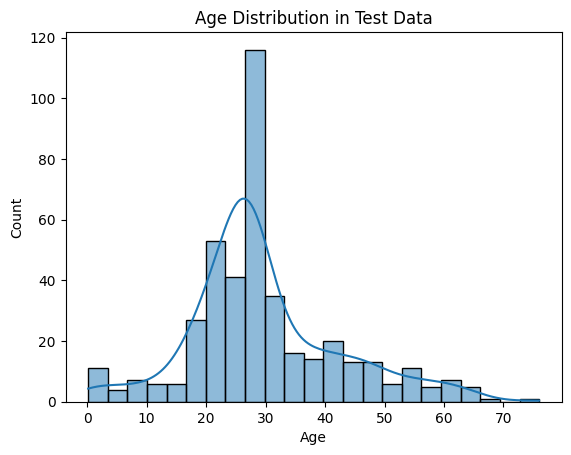

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


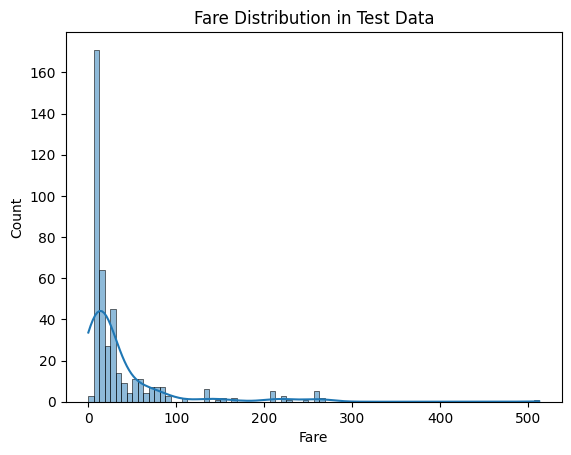

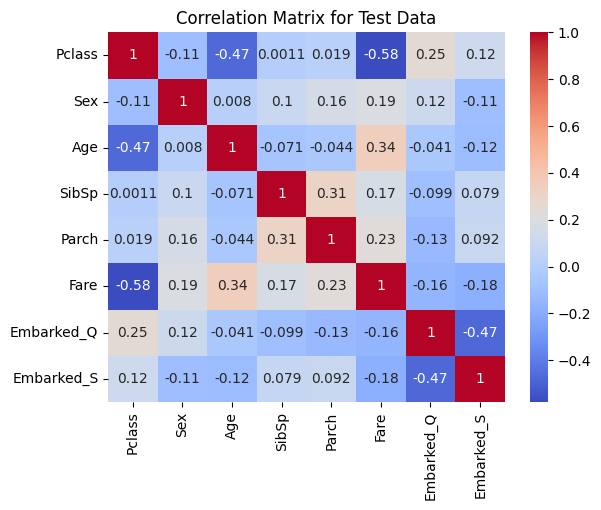

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the test dataset
test_data_path = ('/kaggle/input/titanic/test.csv')  

# Update with the correct path if necessary
test_data = pd.read_csv(test_data_path)

# Handle missing values for 'Age'
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# Handle missing values for 'Fare'
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Drop the 'Cabin' column if it exists
if 'Cabin' in test_data.columns:
    test_data = test_data.drop(columns=['Cabin'])

# Handle missing values for 'Embarked'
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

# Convert 'Sex' to numerical values
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Drop non-numeric columns
test_data = test_data.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Verify that there are no more missing values
missing_values_after_test = test_data.isnull().sum()
print(missing_values_after_test)

# Summary statistics
summary_stats_test = test_data.describe(include='all')
print(summary_stats_test)

# Age Distribution
sns.histplot(test_data['Age'], kde=True)
plt.title('Age Distribution in Test Data')
plt.show()

# Fare Distribution
sns.histplot(test_data['Fare'], kde=True)
plt.title('Fare Distribution in Test Data')
plt.show()

# Correlation Matrix
correlation_matrix_test = test_data.corr()
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Test Data')
plt.show()


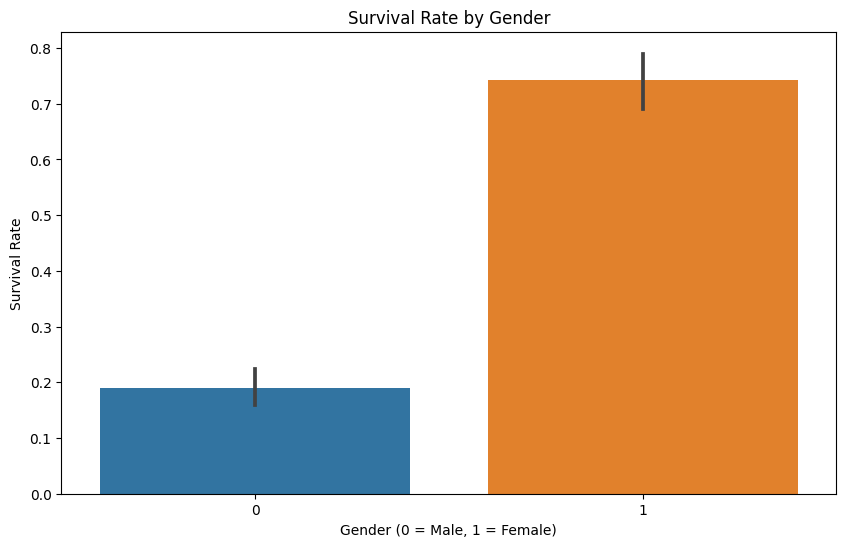

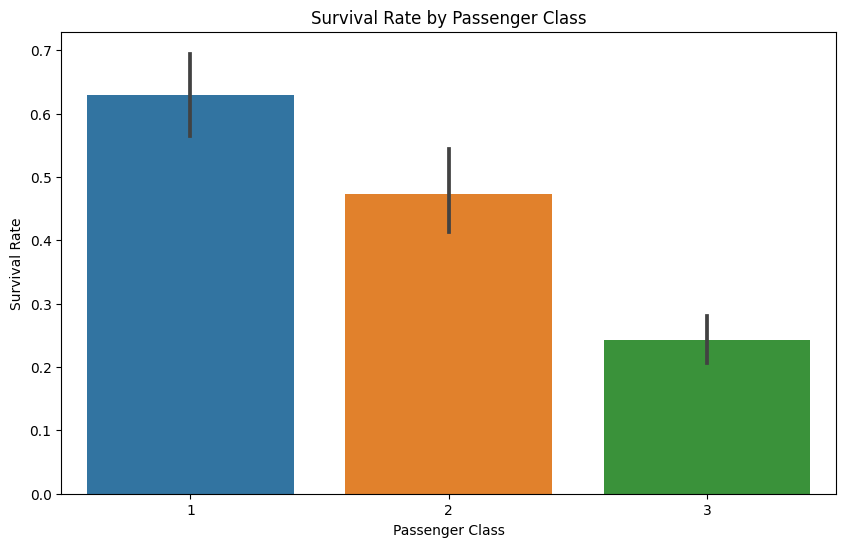

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

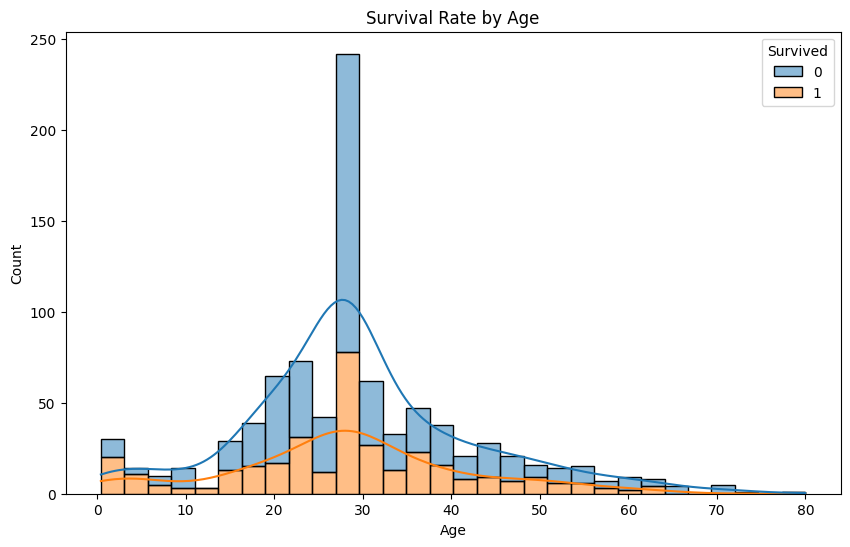

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

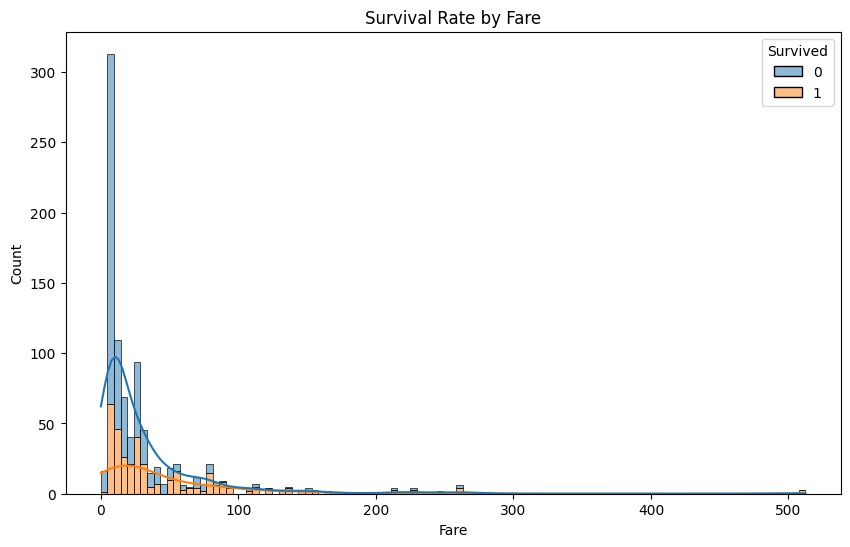

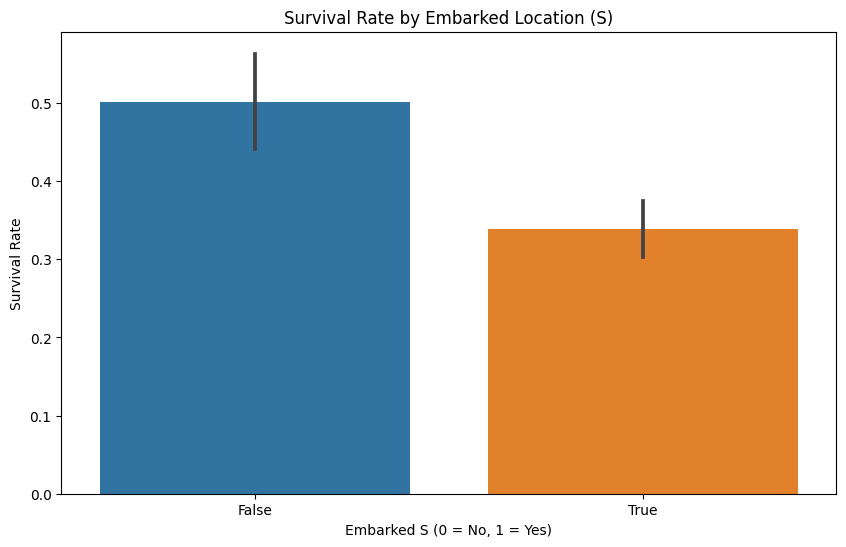

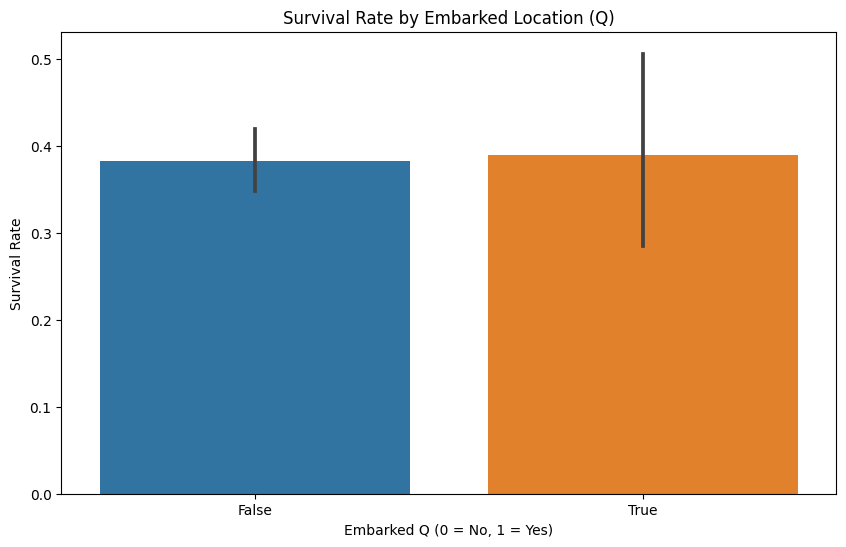

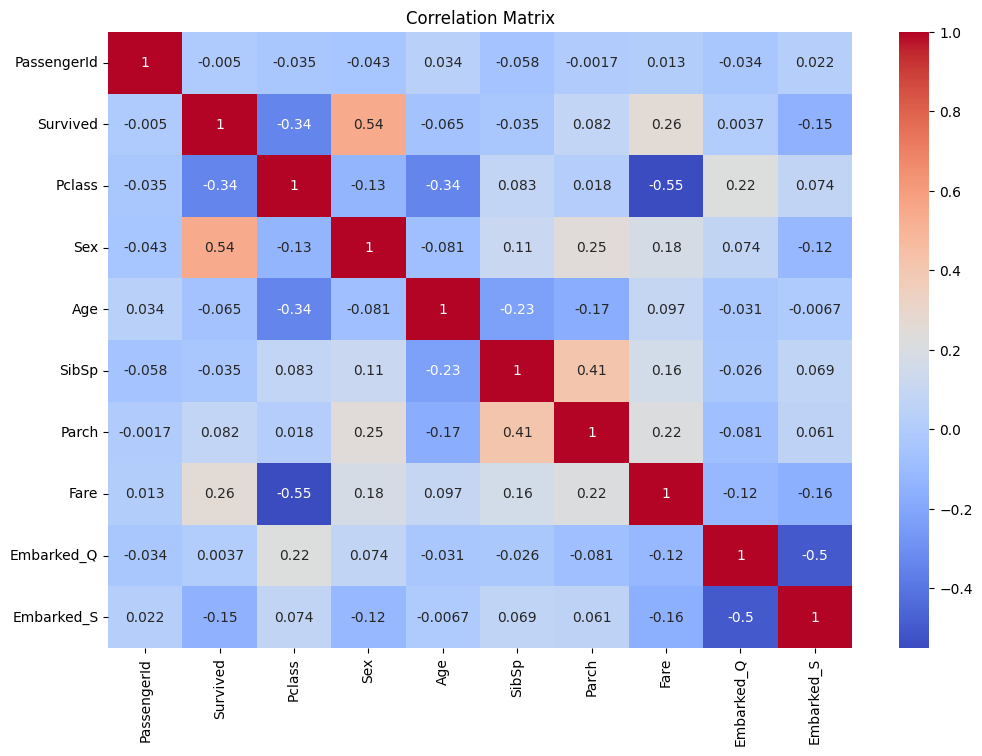

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
train_data_path = ('/kaggle/input/titanic/train.csv')
train_data = pd.read_csv(train_data_path)

# Handle missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Convert categorical variables to numerical
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
train_data = train_data.drop(columns=['Name', 'Ticket', 'Cabin'])

# Survival Rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

# Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Survival Rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival Rate by Fare
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Survival Rate by Embarked Location
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked_S', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked Location (S)')
plt.xlabel('Embarked S (0 = No, 1 = Yes)')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked_Q', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked Location (Q)')
plt.xlabel('Embarked Q (0 = No, 1 = Yes)')
plt.ylabel('Survival Rate')
plt.show()

# Correlation Matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
train_data_path = '/kaggle/input/titanic/train.csv'
train_data = pd.read_csv(train_data_path)

# Handle missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Convert categorical variables to numerical
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
existing_columns_to_drop = [col for col in columns_to_drop if col in train_data.columns]
train_data = train_data.drop(columns=existing_columns_to_drop)

# Split data into features and target
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Load and preprocess the test data
test_data_path = '/kaggle/input/titanic/test.csv'
test_data = pd.read_csv(test_data_path)

# Handle missing values in the test data
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Convert categorical variables to numerical
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Ensure the columns exist before dropping them
columns_to_drop_test = ['Name', 'Ticket', 'Cabin', 'PassengerId']
existing_columns_to_drop_test = [col for col in columns_to_drop_test if col in test_data.columns]

# Keep track of PassengerId
passenger_ids = test_data['PassengerId']

# Drop unnecessary columns
test_data = test_data.drop(columns=existing_columns_to_drop_test)

# Align test data columns with train data columns
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[X_train.columns]

# Generate predictions
predictions = model.predict(test_data)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save to CSV
submission_file_path = 'titanic_submission.csv'
submission.to_csv(submission_file_path, index=False)

# Provide download link
submission_file_path


Validation Accuracy: 0.80


'titanic_submission.csv'